Step 1: Importing Libraries
Libraries imported successfully.

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 31.33 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis
Step 2: Loading Data
There are 1000 rows and 16 columns in this data frame
First 5 rows of the dataset:
              Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4

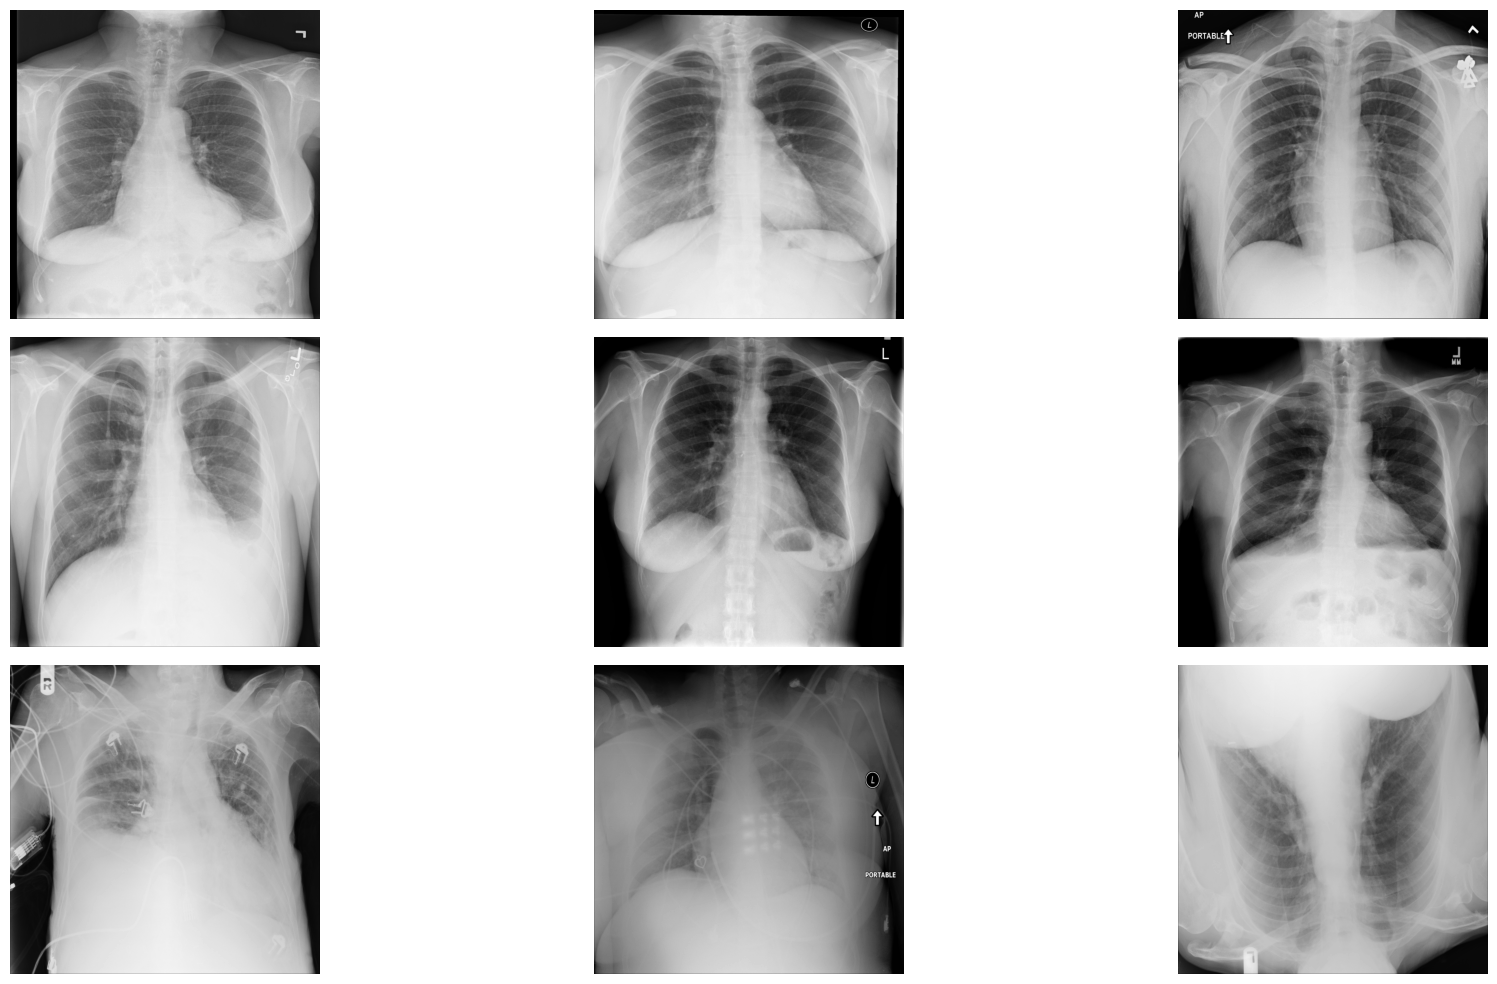

Random images displayed.

Step 4.2: Calculating Image Statistics
Image 1: Max: 0.8902, Min: 0.0000, Mean: 0.5208, Std: 0.2255
------------------------------
Image 2: Max: 1.0000, Min: 0.0000, Mean: 0.6202, Std: 0.2529
------------------------------
Image 3: Max: 1.0000, Min: 0.0000, Mean: 0.5642, Std: 0.2284
------------------------------
Image 4: Max: 1.0000, Min: 0.0314, Mean: 0.7050, Std: 0.1920
------------------------------
Image 5: Max: 1.0000, Min: 0.0000, Mean: 0.4434, Std: 0.2746
------------------------------
Image 6: Max: 0.9922, Min: 0.0000, Mean: 0.4356, Std: 0.2781
------------------------------
Image 7: Max: 0.9373, Min: 0.0196, Mean: 0.5874, Std: 0.2230
------------------------------
Image 8: Max: 1.0000, Min: 0.0000, Mean: 0.4647, Std: 0.2031
------------------------------
Image 9: Max: 0.9647, Min: 0.0118, Mean: 0.6270, Std: 0.1801
------------------------------

Step 4.3: Plotting Histograms for Random Images


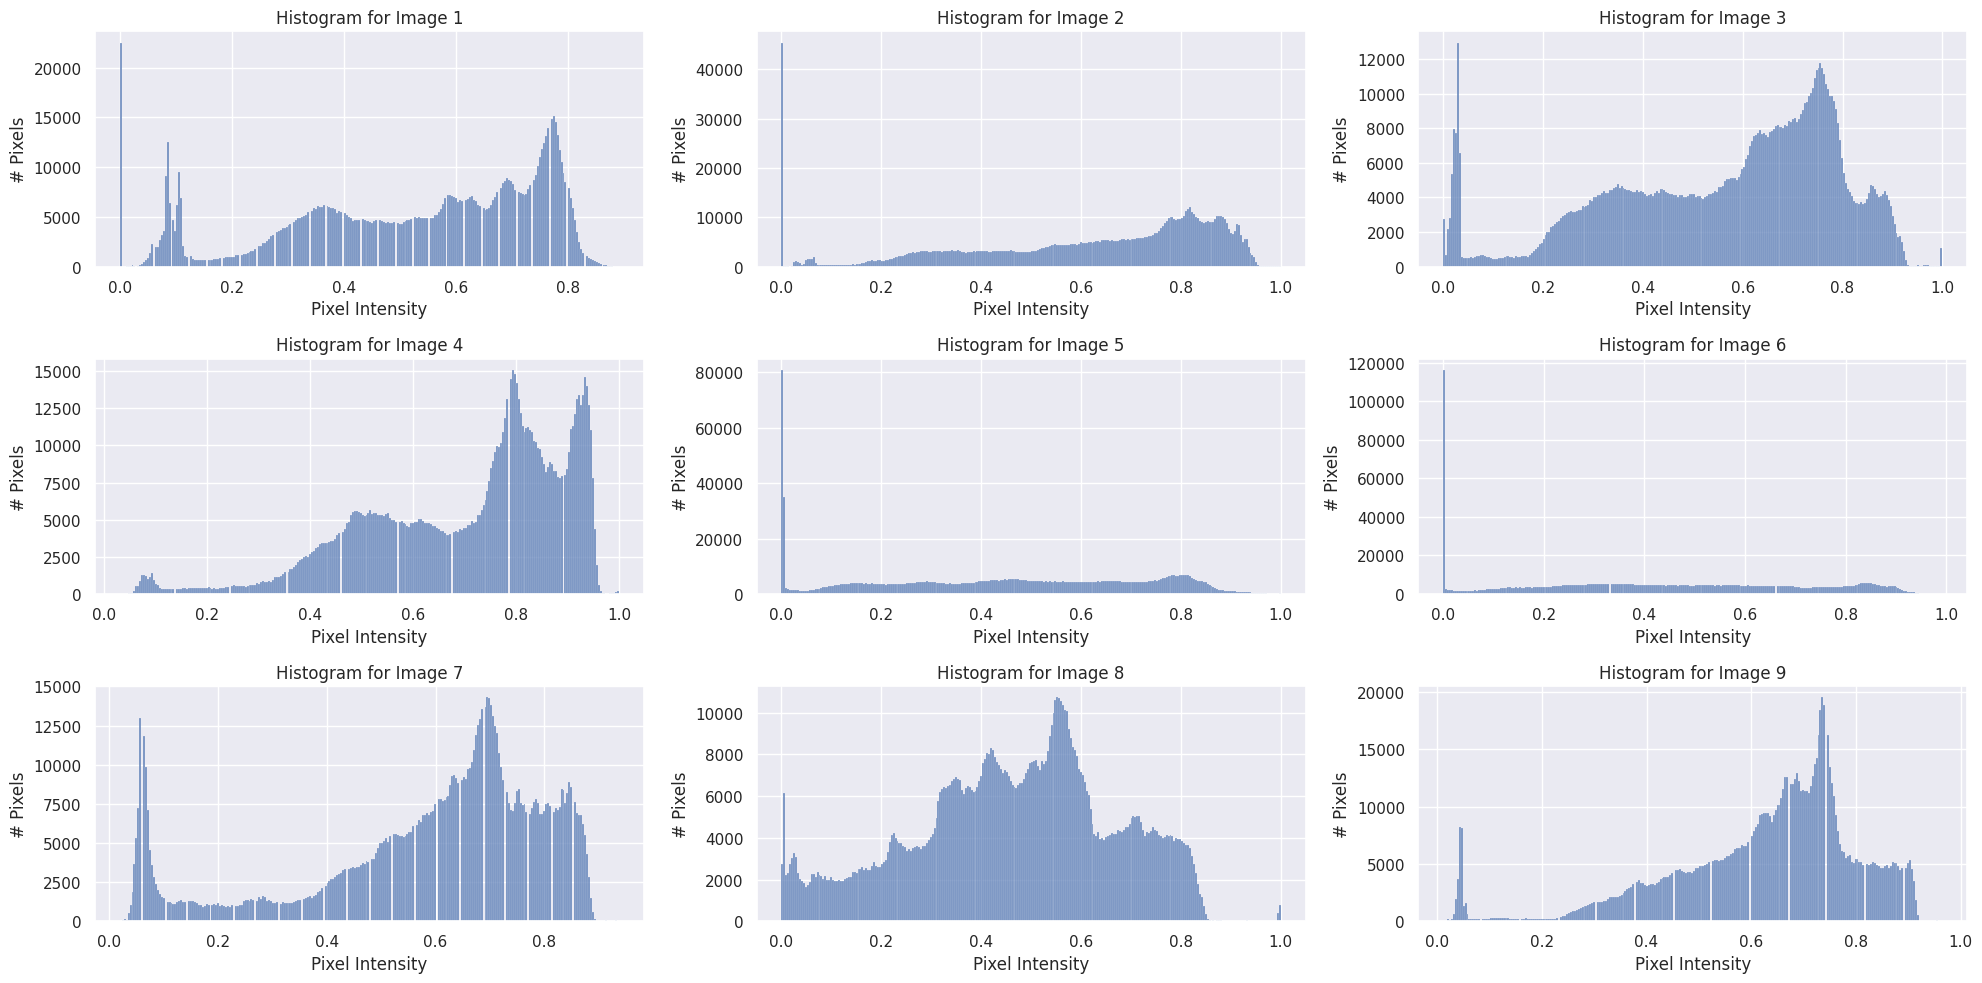


Step 5: Image Enhancement
Applying Contrast Stretching
Applying Histogram Equalization
Applying Gamma Correction


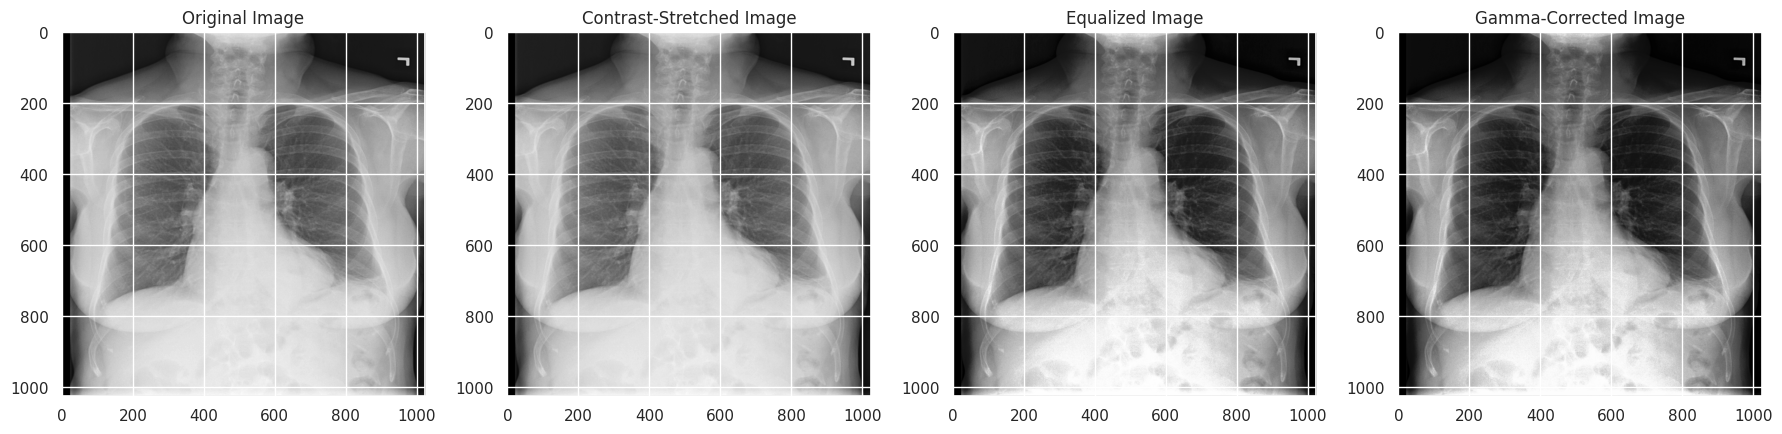

Image enhancement done.

Step 6: Noise Reduction


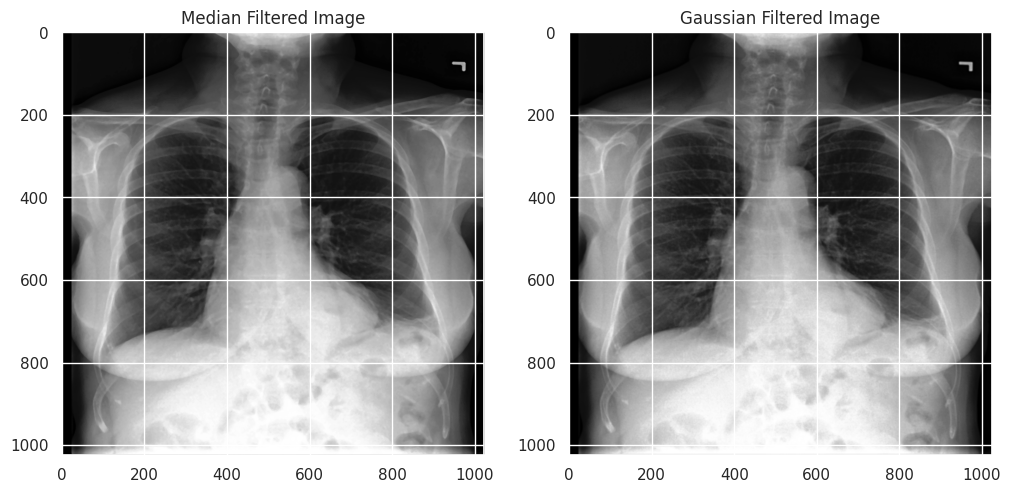

Noise reduction completed.

Step 7: Image Rotation and Flipping


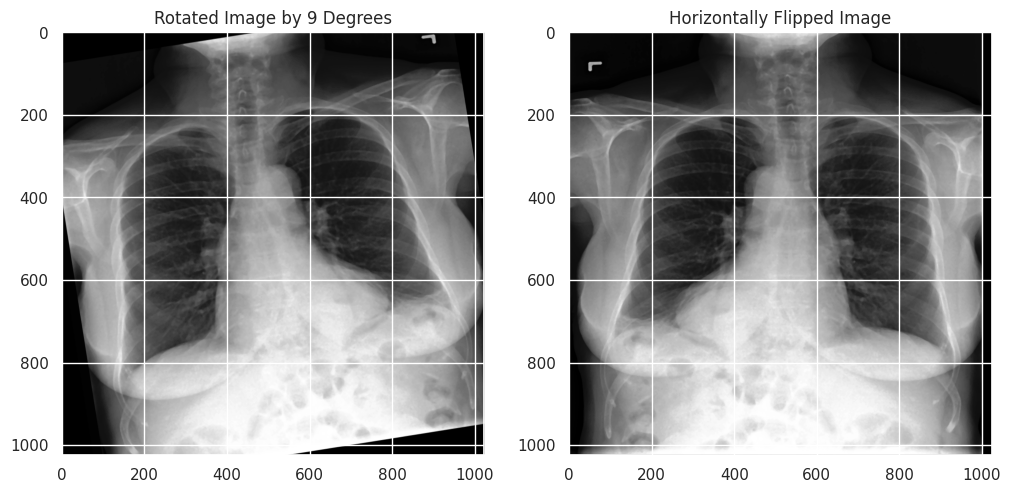

Rotation and flipping done.

Step 8: Frequency Domain Filtering


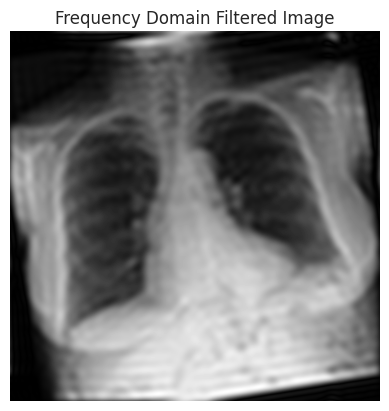

Frequency domain filtering completed.

Step 9: Sharpening and Interpolation


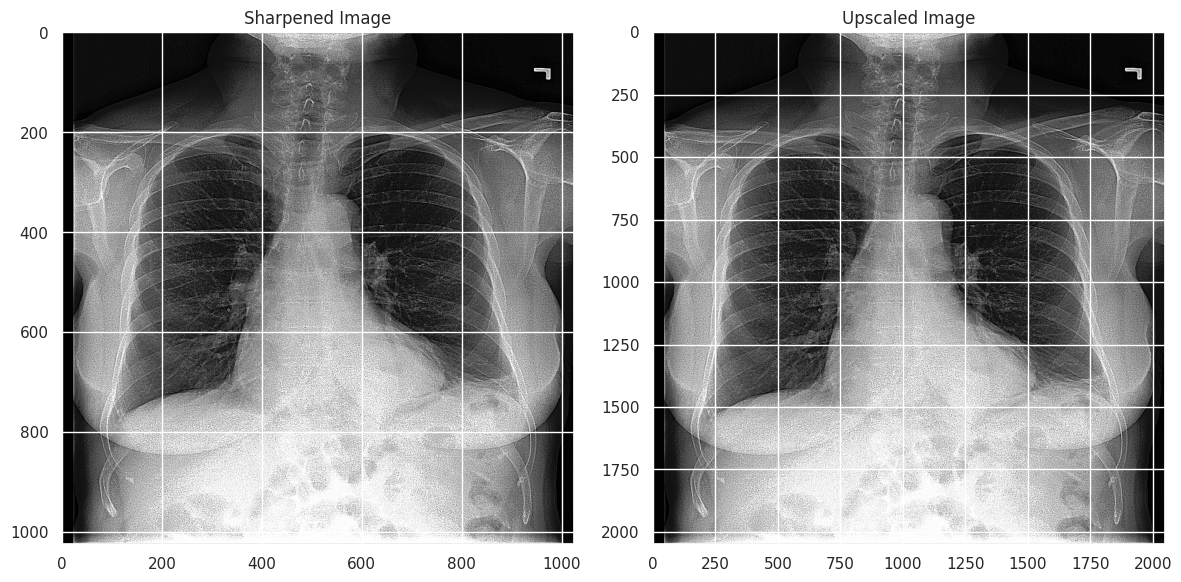

Sharpening and interpolation done.



In [ ]:
# Step 1: Veri Yükleme ve Kütüphanelerin İçe Aktarılması
print("Step 1: Importing Libraries")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from skimage import exposure
from scipy.ndimage import zoom

%matplotlib inline
sns.set()
print("Libraries imported successfully.\n")

!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/
!pip install pickleshare

# Step 2: Veri Setinin Yüklenmesi
print("Step 2: Loading Data")
train_df = pd.read_csv("nih/train-small.csv")
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
print("First 5 rows of the dataset:")
print(train_df.head(), "\n")

# Step 3: Veri Özelliklerinin İncelenmesi
print("Step 3: Exploring Data Characteristics")
train_df.info()
print(f"\nTotal Patient IDs: {train_df['PatientId'].count()}, Unique IDs: {train_df['PatientId'].nunique()}\n")

# Step 4: Görüntü Yükleme ve Görselleştirme
print("Step 4: Loading and Visualizing Random Images")
images = train_df['Image'].values
random_images = [np.random.choice(images) for _ in range(9)]
img_dir = 'nih/images_small/'

plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
print("Random images displayed.\n")

# 2. Rastgele Görüntülerin İstatistiksel Özelliklerini Hesaplama
print("Step 4.2: Calculating Image Statistics")
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    print(f"Image {i+1}: Max: {img.max():.4f}, Min: {img.min():.4f}, Mean: {img.mean():.4f}, Std: {img.std():.4f}")
    print("-" * 30)

# 3. Histogram Çizimi
print("\nStep 4.3: Plotting Histograms for Random Images")
plt.figure(figsize=(20, 10))
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.subplot(3, 3, i + 1)
    sns.histplot(img.ravel(), kde=False, bins=256)
    plt.title(f"Histogram for Image {i+1}")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('# Pixels')
plt.tight_layout()
plt.show()

# Step 5: Görüntü İşleme ve İyileştirme
print("\nStep 5: Image Enhancement")
sample_img = random_images[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))

# 1. Kontrast Germe
print("Applying Contrast Stretching")
min_val, max_val = raw_image.min(), raw_image.max()
contrast_stretched = ((raw_image - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# 2. Histogram Eşitleme
print("Applying Histogram Equalization")
equalized_image = exposure.equalize_hist(contrast_stretched)
equalized_image = (equalized_image * 255).astype(np.uint8)

# 3. Gamma Düzeltme
print("Applying Gamma Correction")
gamma = 1.2
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

# Display image processing results
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1), plt.imshow(raw_image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 4, 2), plt.imshow(contrast_stretched, cmap='gray'), plt.title('Contrast-Stretched Image')
plt.subplot(2, 4, 3), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.subplot(2, 4, 4), plt.imshow(gamma_corrected, cmap='gray'), plt.title('Gamma-Corrected Image')
plt.tight_layout()
plt.show()
print("Image enhancement done.\n")

# Step 6: Gürültü Azaltma
print("Step 6: Noise Reduction")
median_filtered = cv2.medianBlur(gamma_corrected, 5)
gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5, 5), 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(median_filtered, cmap='gray'), plt.title("Median Filtered Image")
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title("Gaussian Filtered Image")
plt.show()
print("Noise reduction completed.\n")

# Step 7: Döndürme ve Ayna Çevirme
print("Step 7: Image Rotation and Flipping")
angle = np.random.randint(0, 11)
center = (median_filtered.shape[1] // 2, median_filtered.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(median_filtered, rotation_matrix, (median_filtered.shape[1], median_filtered.shape[0]))
flipped_image = cv2.flip(median_filtered, 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(rotated_image, cmap='gray'), plt.title(f"Rotated Image by {angle} Degrees")
plt.subplot(1, 2, 2), plt.imshow(flipped_image, cmap='gray'), plt.title("Horizontally Flipped Image")
plt.show()
print("Rotation and flipping done.\n")

# Step 8: Frekans Alanında Filtreleme
print("Step 8: Frequency Domain Filtering")
dft = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)
rows, cols = rotated_image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

fshift = dft_shifted * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(filtered_image, cmap='gray')
plt.title("Frequency Domain Filtered Image")
plt.axis("off")
plt.show()
print("Frequency domain filtering completed.\n")

# Step 9: Keskinleştirme ve Enterpolasyon
print("Step 9: Sharpening and Interpolation")
sharpening_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = np.clip(cv2.filter2D(gamma_corrected, -1, sharpening_kernel), 0, 255).astype(np.uint8)
resized_image = zoom(sharpened_image, 2, order=3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(sharpened_image, cmap='gray'), plt.title("Sharpened Image")
plt.subplot(1, 2, 2), plt.imshow(resized_image, cmap='gray'), plt.title("Upscaled Image")
plt.tight_layout()
plt.show()
print("Sharpening and interpolation done.\n")


